# Preliminary boxing data

This notebook contains a preliminary overview of boxing data, and demonstrate an expected procedure of data preprocessing. </br>
Six continuous datasets were collected for different punches (jab, cross, lead hook, rear hook, lead uppercut, rear uppercut), each of them with a duration of 300 seconds; </br>
Two continuous datasets were collected for the left and right arms when the subject remained standing and jogging around, but no punches were performed, to serve as a control dataset to compare with the behavior of punching data. Both datasets were collected with a duration of 120 seconds. </br>.
(There is a folder in the repo called *Phyphox test* that contains some random data collected when playing around with Phyphox to understand how it works, which are NOT demonstrated in this notebook)</br>
Features we selected are as the follows:
- Rotation on x-axis
- Rotation on y-axis
- Rotation on z-axis
- Acceleration on x-axis
- Acceleration on y-axis
- Acceleration on z-axis
- Barometer(Pressure)

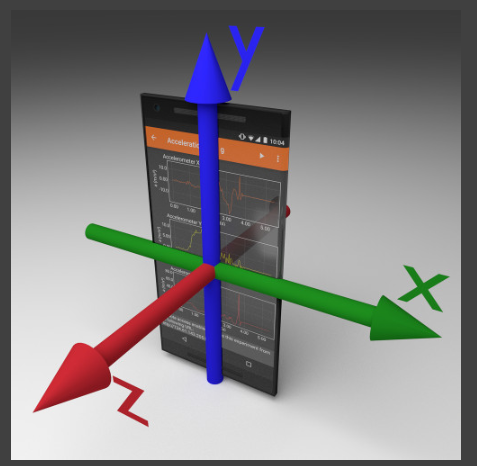
</br>All Rotation and Acceleration datasets were collected at a sampling rate of **50Hz** (50Hz means that mobile device collects 50 datapoints per second). The decision was made due to the following reasons as the follows:
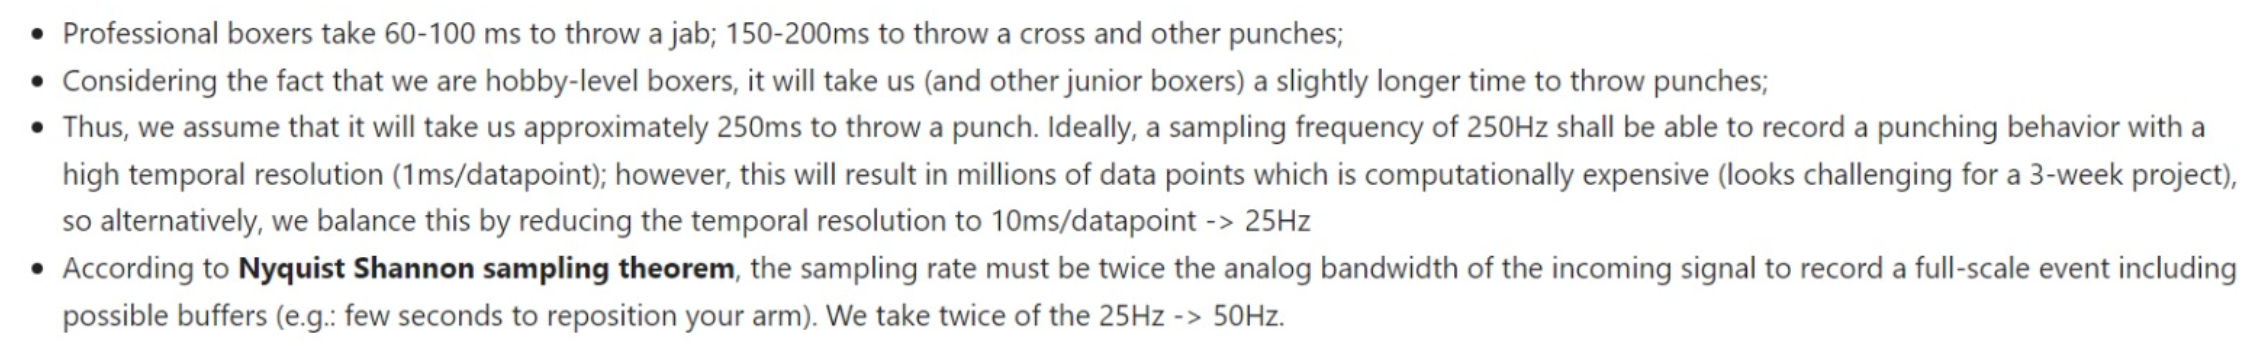
Sampling rate of Barometer was 1Hz by default due to the limitation of Phyphox (cannot manually adjust sampling rate on this feature)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

##### Load raw data

In [171]:
# Change the filepath and dirpath accordingly to the location of datasets on your own device 

# For naming convenience:
# lh -> Lead Hook
# rh -> Rear Hook
# lu -> Lead Uppercut
# ru -> Rear Uppercut
# acc -> Acceleration
# gyr -> Gyroscope (rotation)
# bar -> Barometer (pressure)
# pre -> preliminary

dirpath_left_nopunch = "Data/Preliminary/Preliminary Left No Punch/"
dirpath_right_nopunch = "Data/Preliminary/Preliminary Right No Punch/"
dirpath_jab = "Data/Preliminary/Preliminary Jab/"
dirpath_cross = "Data/Preliminary/Preliminary Cross/"
dirpath_lh = "Data/Preliminary/Preliminary Lead Hook"
dirpath_rh = "Data/Preliminary/Preliminary Rear Hook/"
dirpath_lu = "Data/Preliminary/Preliminary Lead Uppercut/"
dirpath_ru = "Data/Preliminary/Preliminary Rear Uppercut/"

dirpath_savefig = "Figures/"

In [31]:
# Left hand data without punch
pre_lft_nopunch_acc = pd.read_csv(os.path.join(dirpath_left_nopunch,"Accelerometer.csv"))
pre_lft_nopunch_gyr = pd.read_csv(os.path.join(dirpath_left_nopunch,"Gyroscope.csv"))
pre_lft_nopunch_bar = pd.read_csv(os.path.join(dirpath_left_nopunch,"Barometer.csv"))

# Right hand data without punch
pre_rght_nopunch_acc = pd.read_csv(os.path.join(dirpath_right_nopunch,"Accelerometer.csv"))
pre_rght_nopunch_gyr = pd.read_csv(os.path.join(dirpath_right_nopunch,"Gyroscope.csv"))
pre_rght_nopunch_bar = pd.read_csv(os.path.join(dirpath_right_nopunch,"Barometer.csv"))

# Jab data
pre_jab_acc = pd.read_csv(os.path.join(dirpath_jab,"Accelerometer.csv"))
pre_jab_gyr = pd.read_csv(os.path.join(dirpath_jab,"Gyroscope.csv"))
pre_jab_bar = pd.read_csv(os.path.join(dirpath_jab,"Barometer.csv"))

# Cross data
pre_cross_acc = pd.read_csv(os.path.join(dirpath_cross,"Accelerometer.csv"))
pre_cross_gyr = pd.read_csv(os.path.join(dirpath_cross,"Gyroscope.csv"))
pre_cross_bar = pd.read_csv(os.path.join(dirpath_cross,"Barometer.csv"))

# Lead Hook data
pre_lh_acc = pd.read_csv(os.path.join(dirpath_lh,"Accelerometer.csv"))
pre_lh_gyr = pd.read_csv(os.path.join(dirpath_lh,"Gyroscope.csv"))
pre_lh_bar = pd.read_csv(os.path.join(dirpath_lh,"Barometer.csv"))

# Rear Hook data
pre_rh_acc = pd.read_csv(os.path.join(dirpath_rh,"Accelerometer.csv"))
pre_rh_gyr = pd.read_csv(os.path.join(dirpath_rh,"Gyroscope.csv"))
pre_rh_bar = pd.read_csv(os.path.join(dirpath_rh,"Barometer.csv"))

# Lead Uppercut data
pre_lu_acc = pd.read_csv(os.path.join(dirpath_lu,"Accelerometer.csv"))
pre_lu_gyr = pd.read_csv(os.path.join(dirpath_lu,"Gyroscope.csv"))
pre_lu_bar = pd.read_csv(os.path.join(dirpath_lu,"Barometer.csv"))

# Rear Uppercut data
pre_ru_acc = pd.read_csv(os.path.join(dirpath_ru,"Accelerometer.csv"))
pre_ru_gyr = pd.read_csv(os.path.join(dirpath_ru,"Gyroscope.csv"))
pre_ru_bar = pd.read_csv(os.path.join(dirpath_ru,"Barometer.csv"))

In [30]:
# Use dictionary to store all dataframe to simplify the preprocessing later
dict_pre_data = {
    "pre_lft_nopunch_acc" : pre_lft_nopunch_acc,
    "pre_lft_nopunch_gyr" : pre_lft_nopunch_gyr,
    "pre_lft_nopunch_bar" : pre_lft_nopunch_bar,
    "pre_rght_nopunch_acc" : pre_rght_nopunch_acc,
    "pre_rght_nopunch_gyr" : pre_rght_nopunch_gyr,
    "pre_rght_nopunch_bar" : pre_rght_nopunch_bar,    
    "pre_jab_acc" : pre_jab_acc,
    "pre_jab_gyr" : pre_jab_gyr,
    "pre_jab_bar" : pre_jab_bar,    
    "pre_cross_acc" : pre_cross_acc,
    "pre_cross_gyr" : pre_cross_gyr,
    "pre_cross_bar" : pre_cross_bar,
    "pre_lh_acc" : pre_lh_acc,
    "pre_lh_gyr" : pre_lh_gyr,
    "pre_lh_bar" : pre_lh_bar,
    "pre_rh_acc" : pre_rh_acc,
    "pre_rh_gyr" : pre_rh_gyr,
    "pre_rh_bar" : pre_rh_bar,
    "pre_lu_acc" : pre_lu_acc,
    "pre_lu_gyr" : pre_lu_gyr,
    "pre_lu_bar" : pre_lu_bar,
    "pre_ru_acc" : pre_ru_acc,
    "pre_ru_gyr" : pre_ru_gyr,
    "pre_ru_bar" : pre_ru_bar,}

# 1. Quick inspection on Raw Data

###### Examples of gyroscope data 

In [21]:
pre_jab_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.014033,0.036350,0.066732,-0.026586
1,0.033881,0.028940,0.087545,-0.011587
2,0.053730,0.012154,0.023198,-0.008405
3,0.073579,-0.010219,-0.045865,-0.001012
4,0.093428,-0.030470,-0.064391,-0.000382
...,...,...,...,...
15108,299.918932,0.477073,-0.212525,-4.073396
15109,299.938784,0.437361,1.589063,-3.561634
15110,299.958636,0.442428,1.760281,-3.206180
15111,299.978488,0.354708,0.326263,-3.111628


In [22]:
pre_lft_nopunch_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.012734,0.252326,-0.651424,0.296165
1,0.032583,0.223880,-0.795560,0.301735
2,0.052432,0.239676,-0.733272,0.405199
3,0.072281,0.320954,-0.427607,0.490015
4,0.092130,0.417234,-0.029064,0.513688
...,...,...,...,...
6040,119.905332,0.066194,-0.081145,-0.666182
6041,119.925183,0.135233,-0.068941,-0.752311
6042,119.945033,0.230471,-0.063274,-0.799533
6043,119.964884,0.274831,-0.068895,-0.765765


In [23]:
pre_rght_nopunch_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,-0.000904,0.305415,-0.273533,-0.107598
1,0.018945,0.242656,-0.346199,-0.112507
2,0.038795,0.173326,-0.206985,-0.112462
3,0.058645,0.083870,0.045081,-0.091520
4,0.078494,0.019876,0.145125,-0.109911
...,...,...,...,...
6041,119.915967,0.256662,-0.100377,-0.004414
6042,119.935818,0.256706,-0.219010,-0.000963
6043,119.955670,0.239567,-0.298798,0.007920
6044,119.975521,0.193214,-0.260411,0.029011


In [24]:
pre_lh_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.006033,-0.290740,-0.074860,-1.301832
1,0.025883,-0.378357,0.193630,-1.232088
2,0.045732,-0.502853,0.212201,-0.959729
3,0.065581,-0.575509,0.209095,-0.577090
4,0.085431,-0.531506,0.175843,-0.303018
...,...,...,...,...
15108,299.913887,5.955513,4.256994,-0.235912
15109,299.933739,5.011334,2.506068,-0.791618
15110,299.953591,3.777935,2.124903,-1.277554
15111,299.973443,3.145011,3.879576,-1.572987


In [27]:
print(pre_lh_gyr["X (rad/s)"].max())
print(pre_lh_gyr["X (rad/s)"].min())

print(pre_rh_gyr["X (rad/s)"].max())
print(pre_rh_gyr["X (rad/s)"].min())

print(pre_jab_gyr["X (rad/s)"].max())
print(pre_jab_gyr["X (rad/s)"].min())

10.43496037
-13.21522141
10.45415497
-11.63653946
10.6183815
-15.98134327


In [ ]:
print(pre_lh_gyr["X (rad/s)"].max())
print(pre_lh_gyr["X (rad/s)"].min())

print(pre_rh_gyr["X (rad/s)"].max())
print(pre_rh_gyr["X (rad/s)"].min())

print(pre_jab_gyr["X (rad/s)"].max())
print(pre_jab_gyr["X (rad/s)"].min())

In [34]:
# Statistical summary of raw data 
for pre_data in dict_pre_data.keys():
    print(f"{pre_data}:")
    print(dict_pre_data[pre_data].describe())

pre_lft_nopunch_acc:
          Time (s)    X (m/s^2)    Y (m/s^2)    Z (m/s^2)
count  6046.000000  6046.000000  6046.000000  6046.000000
mean     59.992907     8.253742     5.111007     0.934931
std      34.647293     1.722450     1.960765     2.091241
min      -0.002152     0.407752    -2.292183    -9.303603
25%      29.994772     7.139853     3.872298    -0.550181
50%      59.992472     8.218360     4.836517     0.786315
75%      89.990827     9.337957     6.210099     2.353032
max     119.989696    15.390845    14.130466     9.617650
pre_lft_nopunch_gyr:
          Time (s)    X (rad/s)    Y (rad/s)    Z (rad/s)
count  6045.000000  6045.000000  6045.000000  6045.000000
mean     59.997870     0.001184    -0.001280    -0.002467
std      34.641563     0.501370     0.550335     0.359039
min       0.012734    -2.688598    -5.394488    -1.665127
25%      30.004696    -0.227876    -0.248280    -0.209606
50%      59.997435    -0.008951    -0.013301    -0.025760
75%      89.990827     0.23131

From the overview of the data, we can spot that rotation rate, acceleration and barometer seems vary in punch type. </br>\
Now, we consider aggregating the data and try to spot a few differences

# 2. Data-preprocessing demo
In this section, we will demonstrate how data will be expectedly aggregated and labelled, and expected statistical behaviour of data

First let's have a look at their min-max values and distribution. We take Jab as an example:

In [80]:
print("Jab Acceleration:")
for ax in pre_jab_acc.columns:
    print(ax, ":")
    print(pre_jab_acc[ax].max())
    print(pre_jab_acc[ax].min())
    print(" ")

print("Jab Rotations")
for ax in pre_jab_gyr.columns:
    print(ax, ":")
    print(pre_jab_gyr[ax].max())
    print(pre_jab_gyr[ax].min())
    print(" ")

print("Jab Pressure")
for ax in pre_jab_bar.columns:
    print(ax, ":")
    print(pre_jab_bar[ax].max())
    print(pre_jab_bar[ax].min())
    print(" ")

Jab Acceleration:
Time (s) :
299.987174
-0.002094250001
 
X (m/s^2) :
74.3632608
-79.37169571
 
Y (m/s^2) :
72.29366455
-79.78872849
 
Z (m/s^2) :
78.84209702
-36.76699265
 
Jab Rotations
Time (s) :
299.998341
0.01403275
 
X (rad/s) :
10.6183815
-15.98134327
 
Y (rad/s) :
23.59174538
-24.41773415
 
Z (rad/s) :
15.85806274
-19.89309883
 
Jab Pressure
Time (s) :
296.8487837
-0.58117125
 
X (hPa) :
1012.995911
1012.915649
 


In [72]:
# Exclude the time because time is not statistically meaningful (yet)
pre_data_no_time = dict()

for data in dict_pre_data.keys():
    no_time_key = data + "_noTime"
    no_time_df = dict_pre_data[data].drop('Time (s)', axis=1)
    pre_data_no_time.setdefault(no_time_key, no_time_df)

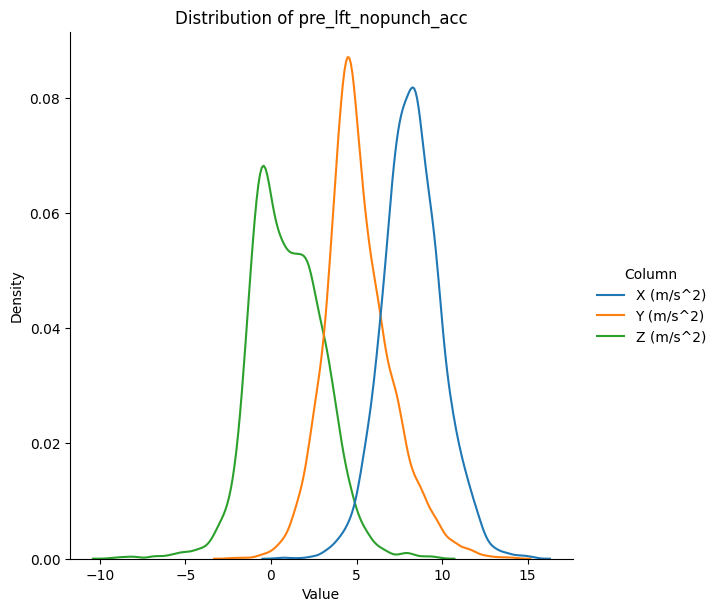

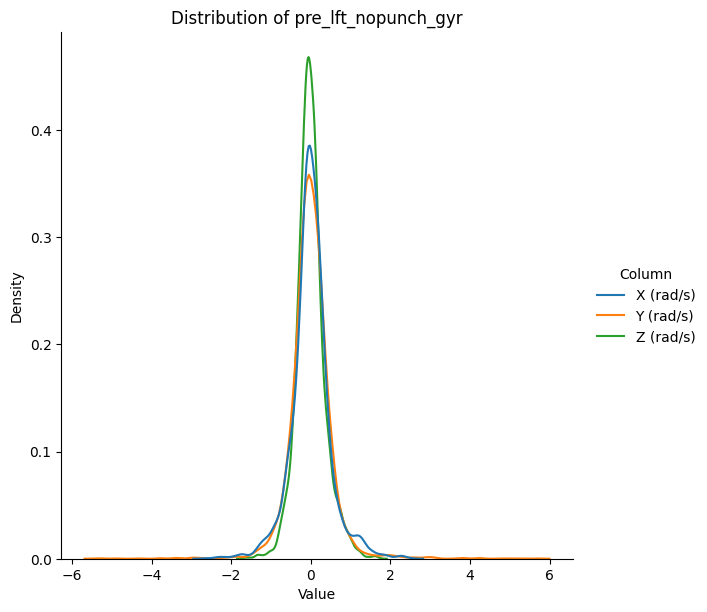

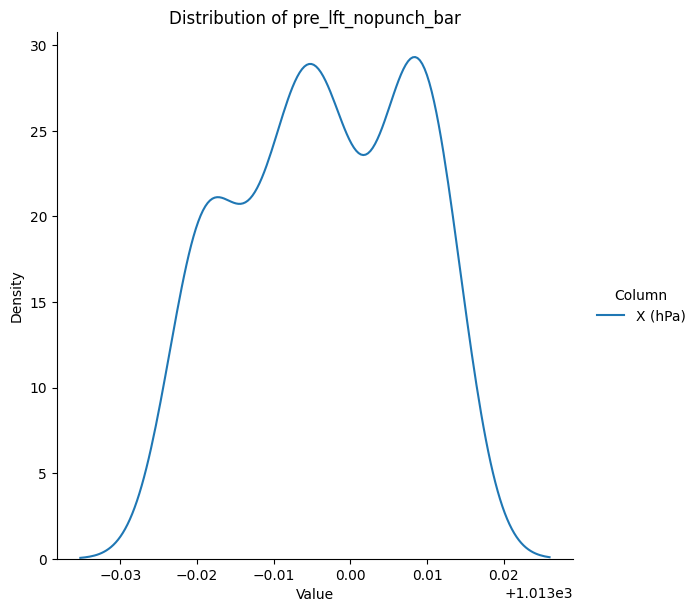

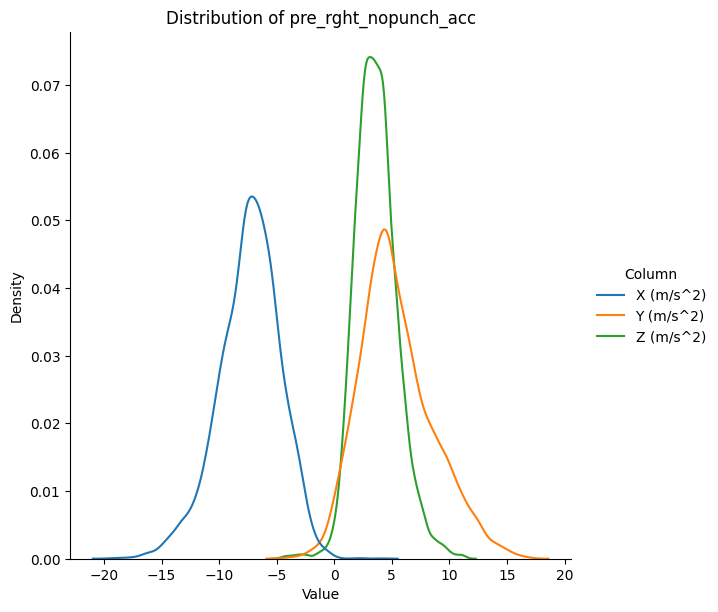

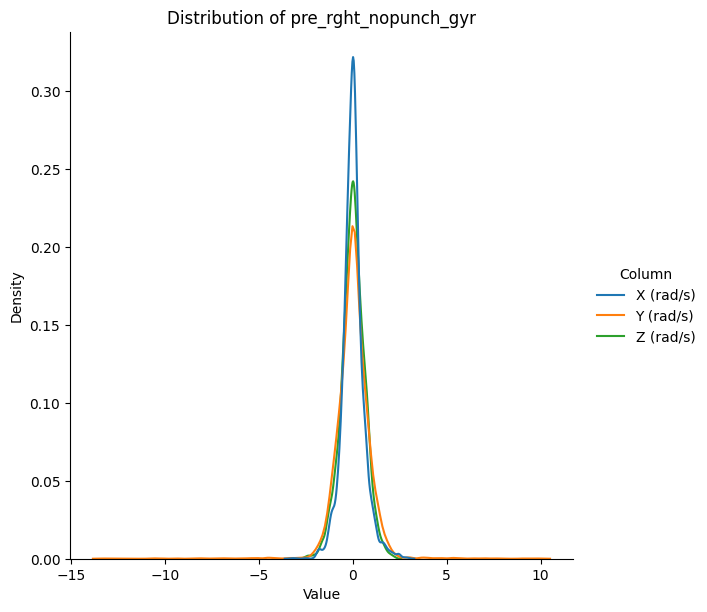

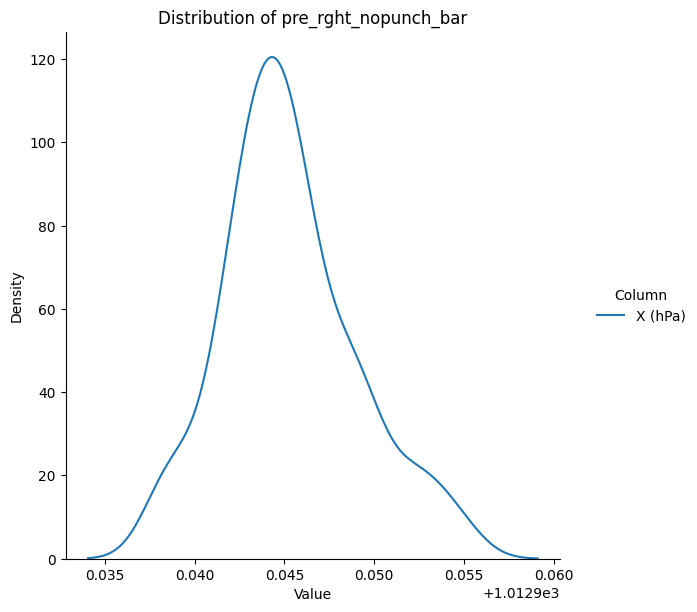

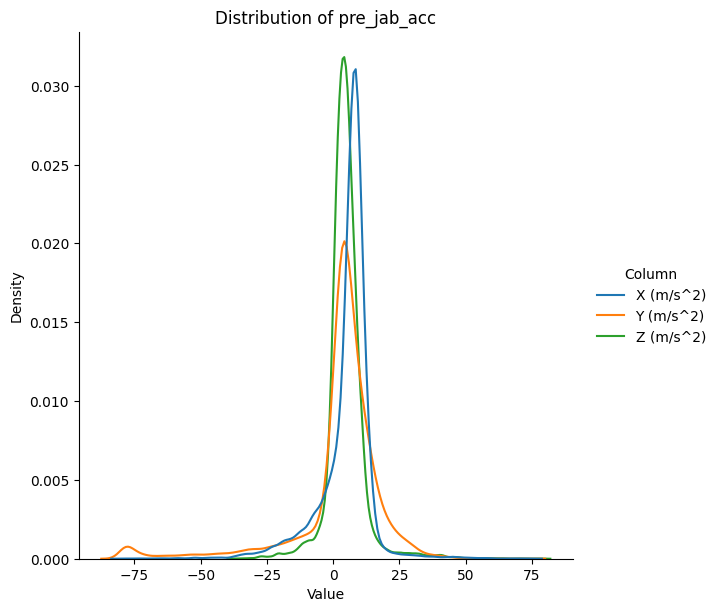

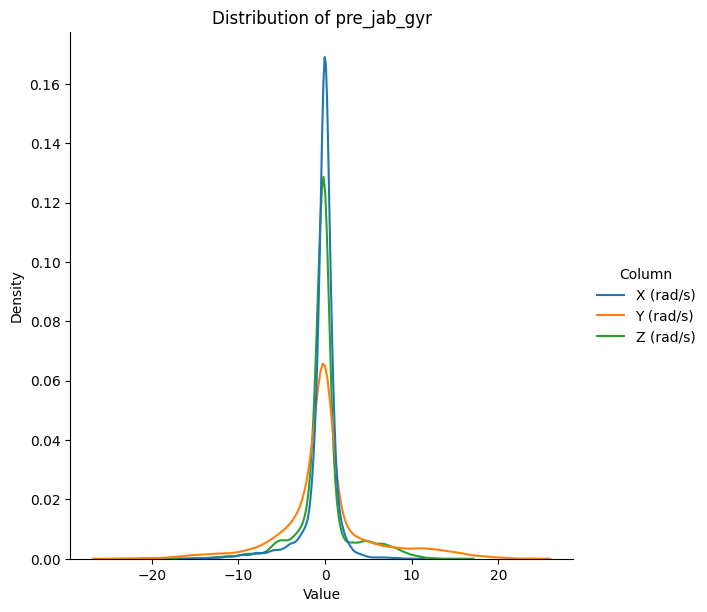

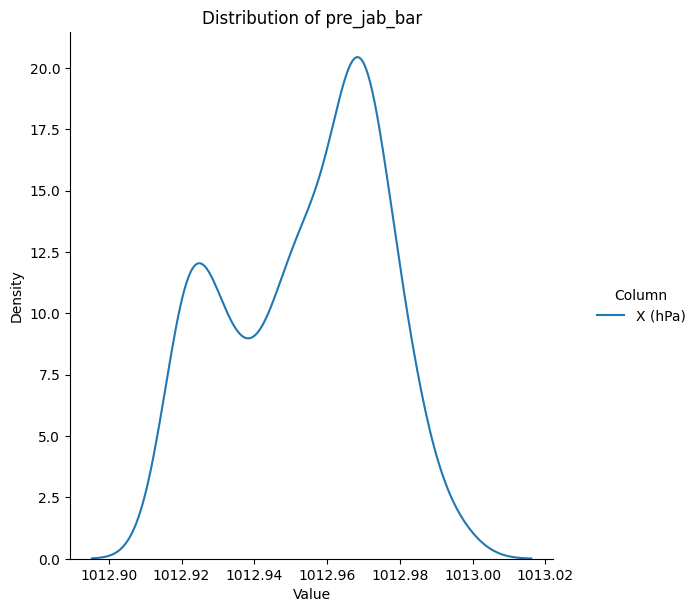

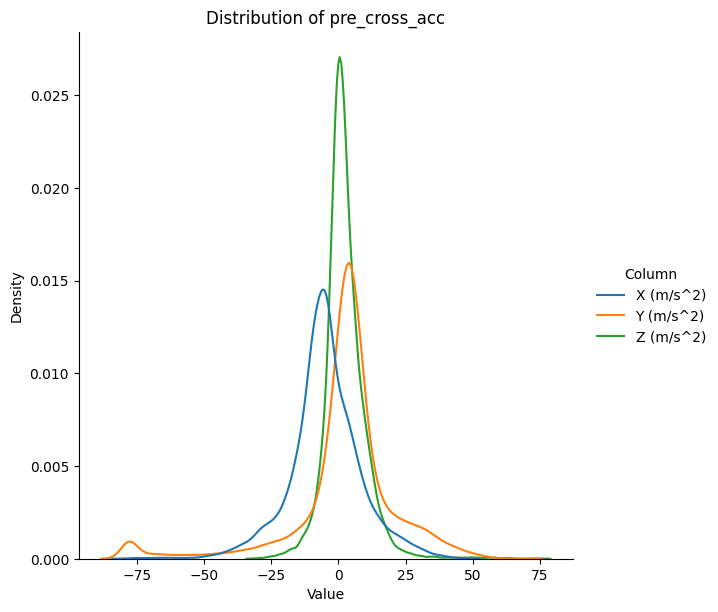

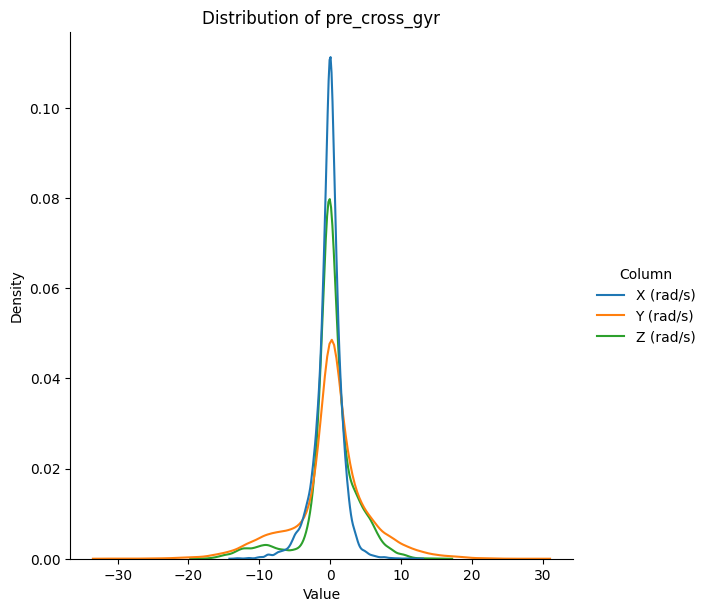

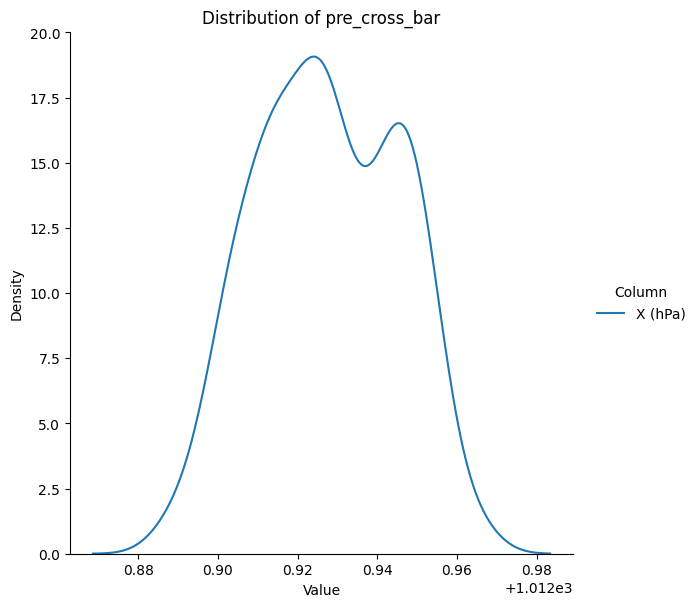

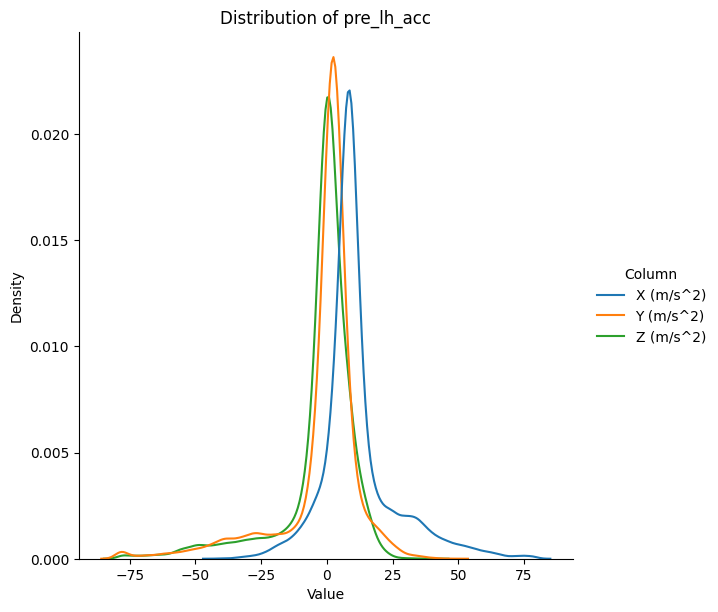

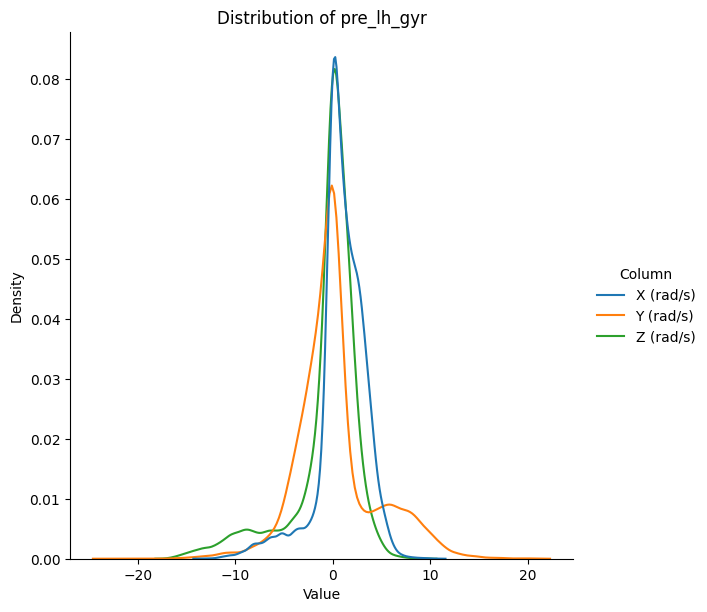

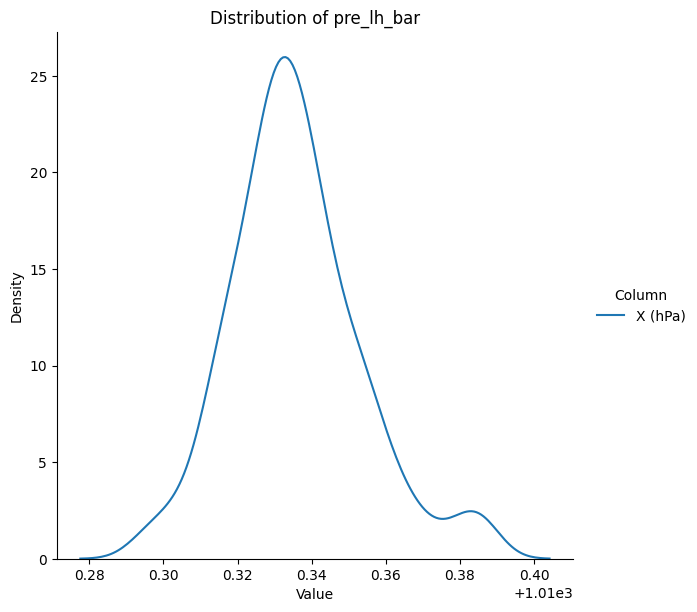

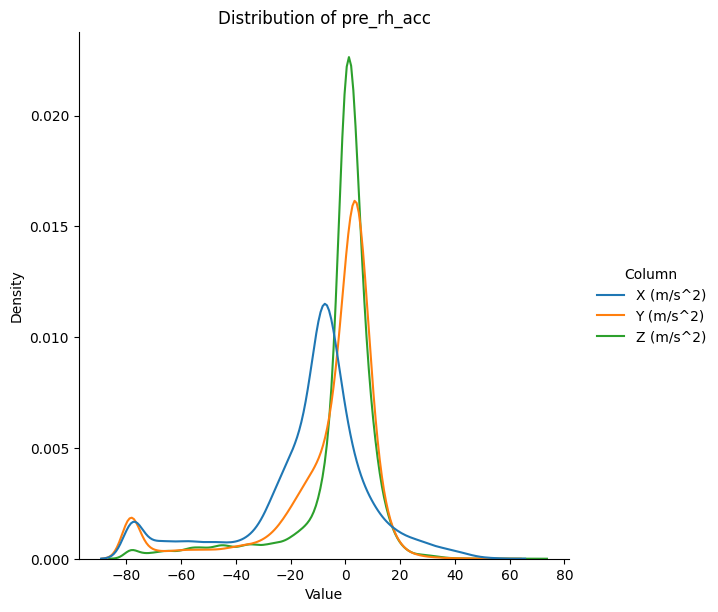

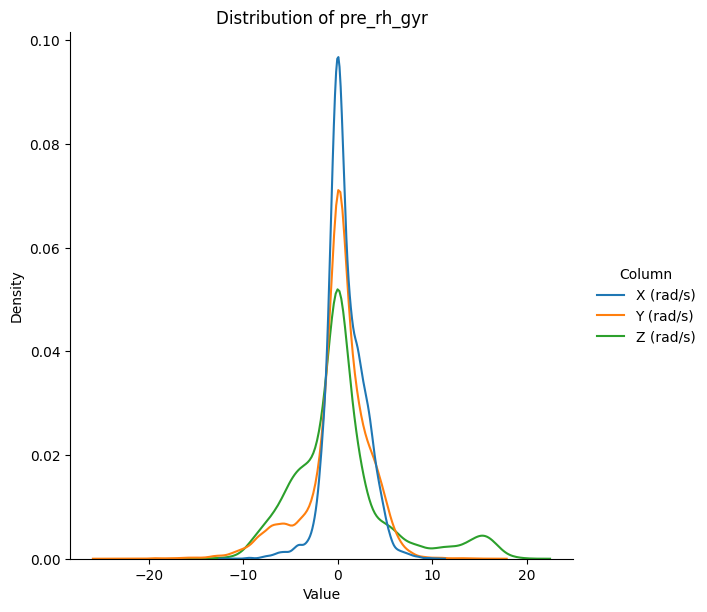

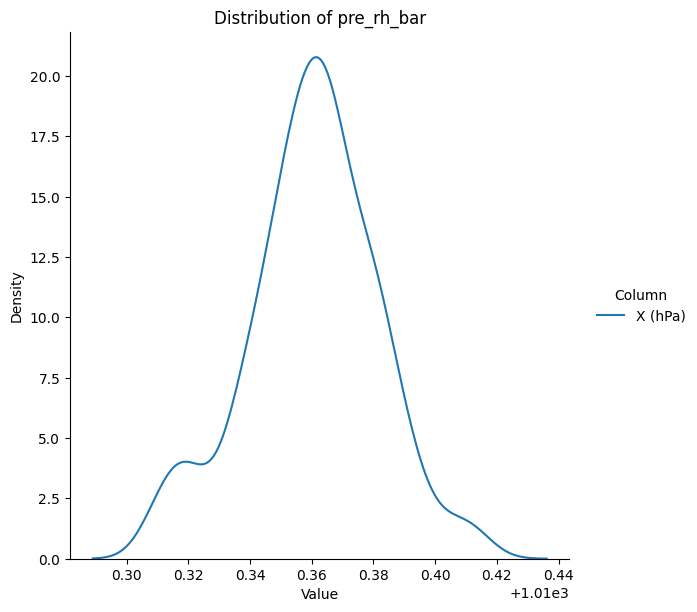

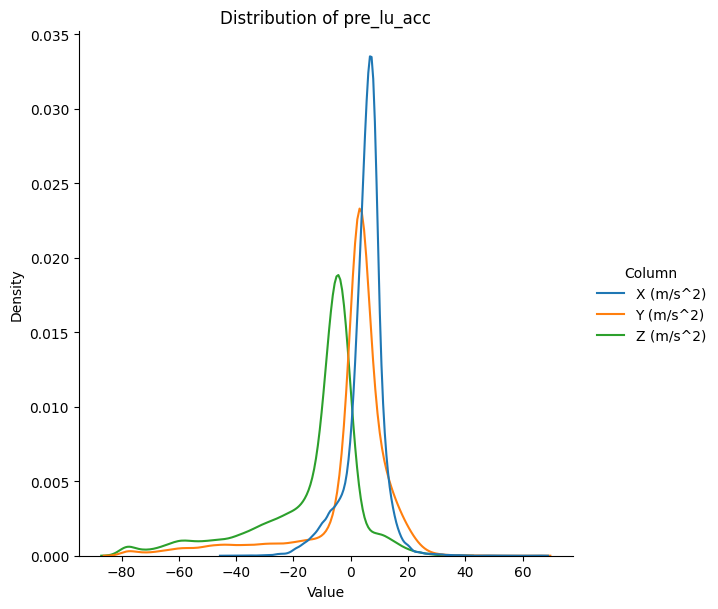

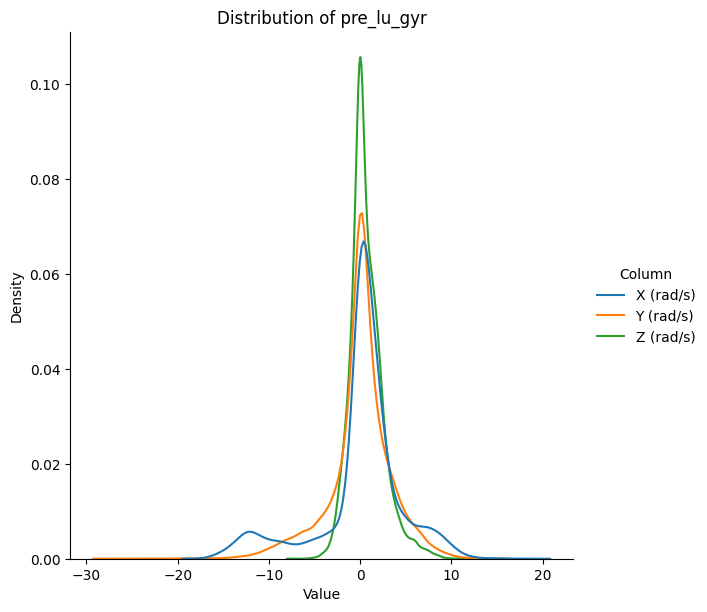

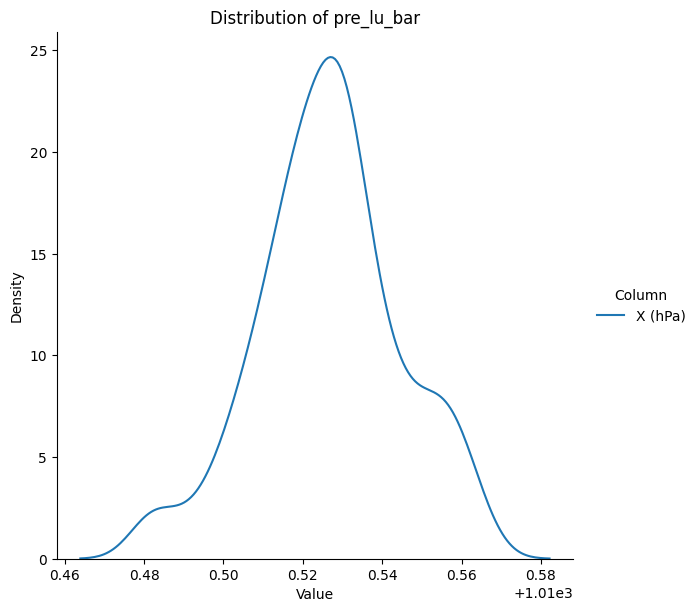

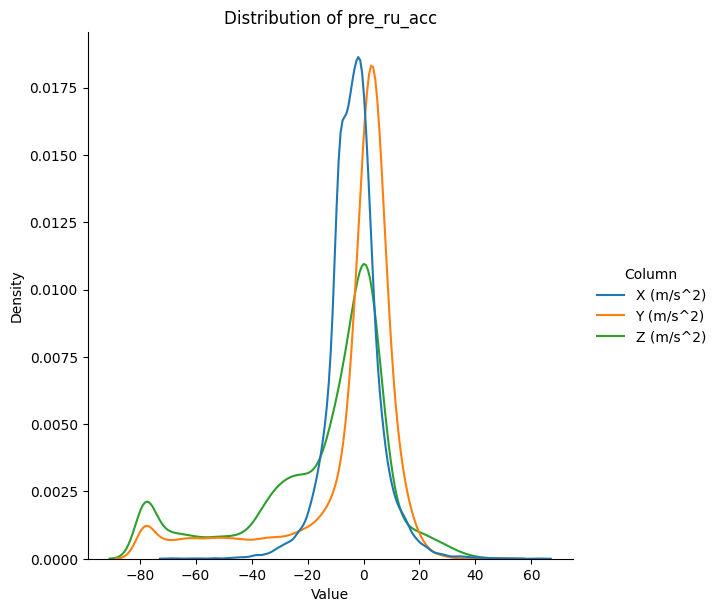

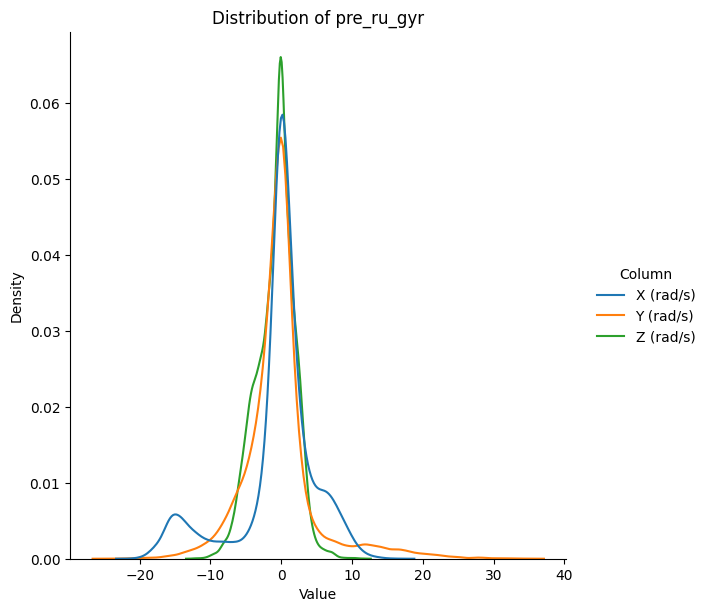

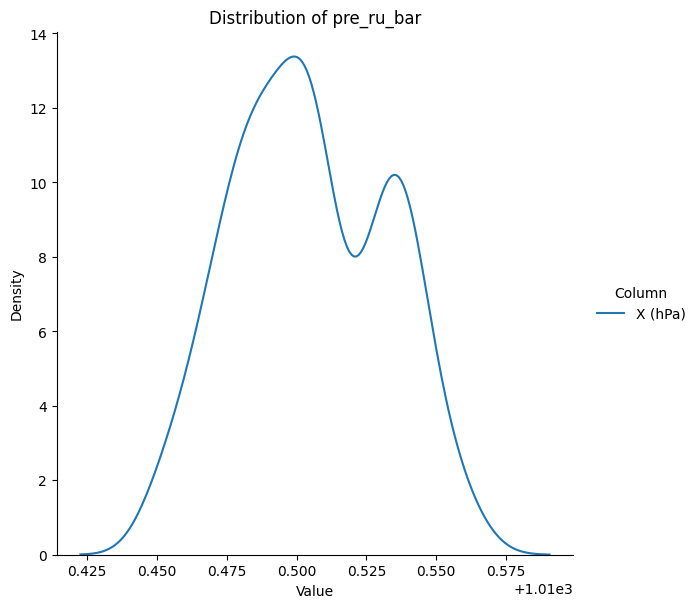

In [163]:
# Plot the distributions
for data in pre_data_no_time.keys():
    df_melted = pre_data_no_time[data].melt(var_name='Column', value_name='Value')

    sns.displot(df_melted, x='Value', hue='Column', kind='kde', height=6, aspect=1)
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of {data.replace("_noTime", "")}')
    plt.show()

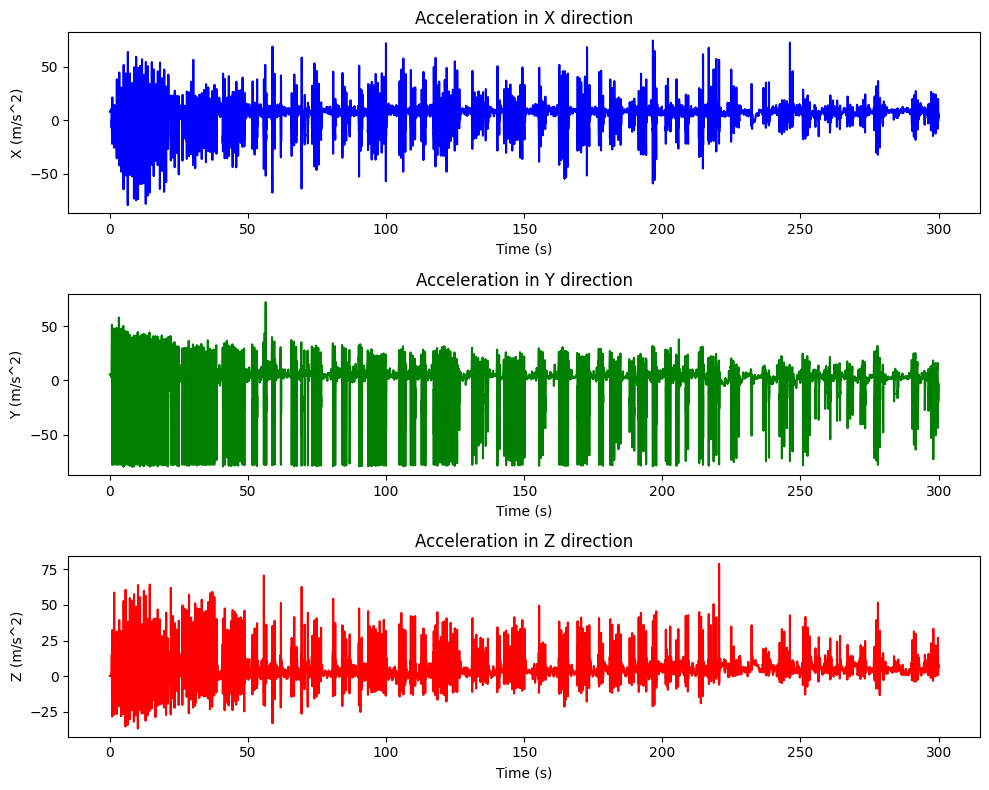

In [177]:
# df_melted = pre_data_no_time["pre_jab_acc_noTime"].melt(var_name="Direction", value_name="(m/s^2)")
# sns.displot(df_melted, x="(m/s^2)", hue="Direction", kind="kde")

# x = pre_jab_acc["Time (s)"]
# y_x = pre_jab_acc["X (m/s^2)"]
# y_y = pre_jab_acc["Y (m/s^2)"]
# y_z = pre_jab_acc["Z (m/s^2)"]

# # Create subplots
# fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# # Plot for X (m/s^2)
# axs[0].plot(x, y_x, color='b')
# axs[0].set_title('Acceleration in X direction')
# axs[0].set_xlabel('Time (s)')
# axs[0].set_ylabel('X (m/s^2)')

# # Plot for Y (m/s^2)
# axs[1].plot(x, y_y, color='g')
# axs[1].set_title('Acceleration in Y direction')
# axs[1].set_xlabel('Time (s)')
# axs[1].set_ylabel('Y (m/s^2)')

# # Plot for Z (m/s^2)
# axs[2].plot(x, y_z, color='r')
# axs[2].set_title('Acceleration in Z direction')
# axs[2].set_xlabel('Time (s)')
# axs[2].set_ylabel('Z (m/s^2)')

# plt.tight_layout()

# plt.savefig(os.path.join("Series of Acceleration of Jab"))
# plt.show()


Datapoints are collected on their axis. Positive values mean the measurement towards the axis forward; negative means backward.</br>
From the distribution plots we can see that they are approximately normally distributed.
###### Aggregation idea: 
1. For Acceleration and Rotation (Gyroscope): group every 50 datapoints by **mean of absolut value** (window of 1 second).
2. For Barometer (pressure): Because Pressure were already collected at a sampling rate of 1Hz by default, due to the Phyphox limitation, we simply align the barometer data with other aggregated features.
   
We use the mean of absolute value because:
- If we take mean: pos-neg values will **offset** the result and measurements will be inaccurate;
- If we take median: Because radius and accelerations are approximately normally distributed, all medians will lie around zero;
- If we take (absolute) sum: pos-neg value will offset each other and/or cannot tell if the hand was moving forward or backward

## 2.1: Data Aggregation
Aggregate data by groupping the mean of absolute value per 50 frames, thus returns a dataframe with window size of 1 second.

In [119]:
def aggregate_data(df):

    """
    returns an aggregated dataframe on a window of 50 datapoints. Discard the remainders that have less than 50 datapoints.
    :param df: The Raw Data
    :returns df_agg: A dataframe with features aggregated.
    """

    # Make a copy of the original df, remove the remaining window that are less than 50 (this can happen due to the device)
    len_df = len(df) // 50 * 50
    df_copy = df[:len_df].copy()
    df_colnames = df_copy.columns

    # Make a template of aggregated df
    df_agg = {
        df_colnames[0]: [],
        df_colnames[1]: [],
        df_colnames[2]: [],        
    }
        
    i = 0
    j = 50

    # Calculate the mean of absolute values of each window (every 50 datapoints)
    # All mean values will be rounded to 3 decimals
    while j <= len_df:
        df_window = df_copy[i:j]
        agg_values = []
        
        for col in df_window:
            agg_values.append(df_window[col].abs().mean())

        df_agg[df_colnames[0]].append(agg_values[0].round(3))
        df_agg[df_colnames[1]].append(agg_values[1].round(3))
        df_agg[df_colnames[2]].append(agg_values[2].round(3))
            
            
        i += 50
        j += 50

    # Convert aggregated values into a dataframe
    df_agg = pd.DataFrame(df_agg)

    return df_agg
    

In [118]:
test_df = aggregate_data(pre_data_no_time["pre_jab_acc_noTime"])
test_df

,X (m/s^2),Y (m/s^2),Z (m/s^2)
0,8.925,14.832,4.943
1,8.740,15.640,8.607
2,10.453,15.200,8.417
3,12.217,19.120,7.228
4,13.070,20.061,9.513
...,...,...,...
297,6.233,6.584,6.483
298,7.626,7.263,5.062
299,9.262,10.416,4.832
300,9.561,13.182,6.299


In [135]:
# Convert all dataframe except the barometer

dict_pre_data_agg = dict()

for data in pre_data_no_time.keys():
    
    if "_bar_" not in data:
        key_data = data.replace("_noTime","_agg")
        value_data = aggregate_data(pre_data_no_time[data])
        dict_pre_data_agg.setdefault(key_data, value_data)
        
    else:
        dict_pre_data_agg.setdefault(data.replace("_noTime", "_agg"), pre_data_no_time[data])


dict_pre_data_agg

{'pre_lft_nopunch_acc_agg':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)
 0        8.880      4.638      2.339
 1        8.641      4.371      1.852
 2        9.140      4.115      1.934
 3        8.800      4.196      2.034
 4        7.756      5.582      1.497
 ..         ...        ...        ...
 115      8.052      5.709      1.643
 116      8.186      5.649      1.052
 117      7.686      5.296      1.537
 118      8.489      5.000      1.309
 119      7.608      5.837      2.633
 
 [120 rows x 3 columns],
 'pre_lft_nopunch_gyr_agg':      X (rad/s)  Y (rad/s)  Z (rad/s)
 0        0.181      0.466      0.230
 1        0.157      0.400      0.182
 2        0.215      0.783      0.220
 3        0.177      0.267      0.234
 4        0.146      0.199      0.171
 ..         ...        ...        ...
 115      0.466      0.428      0.362
 116      0.586      0.370      0.320
 117      0.594      0.359      0.274
 118      0.625      0.620      0.393
 119      0.191      0.206      0.267
 
 [120

## 2.2 Data transformation and labelling
In this section, we demonstrate how we will:
1. Concatinate features of a punch type to one single dataframe
2. Label the dataframe
3. Save the preprocessed dataframe to local

In [146]:
# Concatinate the features to the same punch type

dict_transformed_data= dict()
punch_types = ['lft_nopunch', 'rght_nopunch','jab','cross', 'lh', 'rh', 'lu','ru']

i = 0
j = 3
idx_punch_types = 0
while j <= 24:
    concat_df = pd.concat([df for df in [feature_df for feature_df in dict_pre_data_agg.values()][i:j]], axis=1)
    dict_transformed_data.setdefault("transformed_" + punch_types[idx_punch_types], concat_df)
    i += 3
    j += 3
    idx_punch_types += 1

dict_transformed_data    

{'transformed_lft_nopunch':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)  X (rad/s)  Y (rad/s)  Z (rad/s)  \
 0        8.880      4.638      2.339      0.181      0.466      0.230   
 1        8.641      4.371      1.852      0.157      0.400      0.182   
 2        9.140      4.115      1.934      0.215      0.783      0.220   
 3        8.800      4.196      2.034      0.177      0.267      0.234   
 4        7.756      5.582      1.497      0.146      0.199      0.171   
 ..         ...        ...        ...        ...        ...        ...   
 115      8.052      5.709      1.643      0.466      0.428      0.362   
 116      8.186      5.649      1.052      0.586      0.370      0.320   
 117      7.686      5.296      1.537      0.594      0.359      0.274   
 118      8.489      5.000      1.309      0.625      0.620      0.393   
 119      7.608      5.837      2.633      0.191      0.206      0.267   
 
          X (hPa)  
 0    1012.991638  
 1    1012.994385  
 2    1012.997131  
 3 

In [180]:
dict_transformed_data["transformed_jab"].head()

,X (m/s^2),Y (m/s^2),Z (m/s^2),X (rad/s),Y (rad/s),Z (rad/s),X (hPa),Punch Type
0,8.925,14.832,4.943,1.414,2.987,1.559,1012.981262,jab
1,8.740,15.640,8.607,1.587,5.303,2.169,1012.968826,jab
2,10.453,15.200,8.417,1.608,4.786,2.158,1012.956390,jab
3,12.217,19.120,7.228,1.326,4.604,2.515,1012.956390,jab
4,13.070,20.061,9.513,2.197,7.206,3.114,1012.964706,jab


In [156]:
# label the data 
# There are missing values in Barometers due to the measurement limitation. We firstly try to fill them in by mean

def dataframe_labeller(df,label):
    df["Punch Type"] = label

for idx, df_name in enumerate(dict_transformed_data):
    dataframe_labeller(dict_transformed_data[df_name], punch_types[idx])
    barometer_mean = dict_transformed_data[df_name]["X (hPa)"].mean()
    dict_transformed_data[df_name]["X (hPa)"] = dict_transformed_data[df_name]["X (hPa)"].fillna(barometer_mean)

dict_transformed_data

{'transformed_lft_nopunch':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)  X (rad/s)  Y (rad/s)  Z (rad/s)  \
 0        8.880      4.638      2.339      0.181      0.466      0.230   
 1        8.641      4.371      1.852      0.157      0.400      0.182   
 2        9.140      4.115      1.934      0.215      0.783      0.220   
 3        8.800      4.196      2.034      0.177      0.267      0.234   
 4        7.756      5.582      1.497      0.146      0.199      0.171   
 ..         ...        ...        ...        ...        ...        ...   
 115      8.052      5.709      1.643      0.466      0.428      0.362   
 116      8.186      5.649      1.052      0.586      0.370      0.320   
 117      7.686      5.296      1.537      0.594      0.359      0.274   
 118      8.489      5.000      1.309      0.625      0.620      0.393   
 119      7.608      5.837      2.633      0.191      0.206      0.267   
 
          X (hPa)   Punch Type  
 0    1012.991638  lft_nopunch  
 1    1012.994385

In [155]:
# Save the transformed dataframe to local
destination_dirpath = "Data/Preprocessed Data" # Change the destination path manually if needed
# os.chdir(destination_dirpath)

for df_name, df in dict_transformed_data.items():
    df.to_csv(f"{df_name}.csv",index=False)

<Axes: >

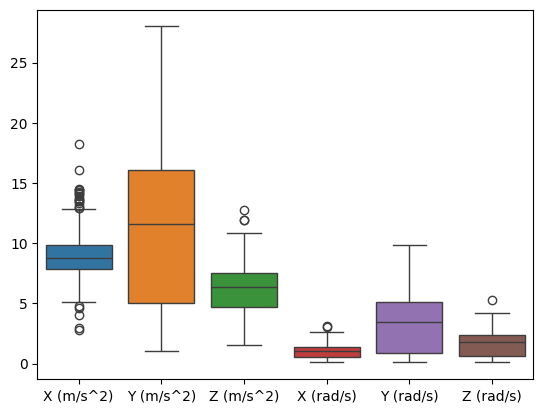

In [179]:
sns.boxplot(dict_transformed_data["transformed_jab"].drop("X (hPa)", axis=1))